In [115]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
from urllib.request import urlopen
# import random
import re
# import scrapy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Si miramos los datos por provincias, Zaragoza, es la que cuenta con mayor producción eólica con 5.490 GWh.

Con aproximadmaente 6.950 megativos-hora generados en 2022, Extremadura se convirtió en la región española con mayor generación solar fotovoltaica del año referido. Castilla-La Mancha y Andalucía se situaron en segunda y tercera posición, respectivamente.

Datos Barcelona

In [49]:
df = pd.read_csv("C:/Users/sicil/Desktop/Ironhack/Projects/Project_2/Data/2021_MeteoCat_Detall_Estacions.csv")

In [50]:
# Seleccionar solo las filas correspondientes a los acrónimos deseados
acrónimos_deseados = ["TM", "RS24h", "VVM10"]
df_filtrado = df[df["ACRÒNIM"].isin(acrónimos_deseados)]
df_filtrado['FECHA'] = df_filtrado['DATA_LECTURA'].str[:10]
df_mean = df_filtrado.groupby(['FECHA', 'ACRÒNIM'])['VALOR'].mean().reset_index()

C:\Users\sicil\AppData\Local\Temp\ipykernel_21024\3197233102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['FECHA'] = df_filtrado['DATA_LECTURA'].str[:10]


Datos precio luz

In [51]:
df_luz = pd.read_csv("C:/Users/sicil/Desktop/Ironhack/Projects/Project_2/final_dataset.csv")
df_luz.reset_index(inplace=True)
df_luz.set_index('level_0', inplace=True)
df_filtered = df_luz.iloc[::6, :]
df_filtered.drop(['energy_source', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7', 'date', 'hour', 'energy reference market (MWh)', 'avg price reference market (euro/MWh)', 'energy free market (MWh)', 'avg price free market (euro/MWh)', 'energy total (MWh)', 'free market share (%)', 'reference market share (%)'], axis=1, inplace=True)
df_filtered.reset_index(inplace=True)
df_luz = df.reset_index(drop=True)

C:\Users\sicil\AppData\Local\Temp\ipykernel_21024\414741170.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_luz = pd.read_csv("C:/Users/sicil/Desktop/Ironhack/Projects/Project_2/final_dataset.csv")
C:\Users\sicil\AppData\Local\Temp\ipykernel_21024\414741170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['energy_source', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7', 'date', 'hour', 'energy reference market (MWh)', 'avg price reference market (euro/MWh)', 'energy free market (MWh)', 'avg price free market (euro/MWh)', 'energy total (MWh)', 'free market share (%)', 'reference market share (%)'], axis=1, inplace=True)


In [52]:
df_luz

,DATA_LECTURA,DATA_EXTREM,CODI_ESTACIO,ACRÒNIM,VALOR
0,2021-01-01,NaN,D5,TM,5.3
1,2021-01-01,13:06:00,D5,TX,6.5
2,2021-01-01,23:56:00,D5,TN,3.1
3,2021-01-01,NaN,D5,HRM,77.0
4,2021-01-01,10:36:00,D5,HRX,88.0
...,...,...,...,...,...
18610,2021-12-31,NaN,X8,RS24h,8.4
18611,2021-12-31,NaN,X8,VVM10,0.8
18612,2021-12-31,NaN,X8,DVM10,280.0
18613,2021-12-31,12:06:00,X8,VVX10,4.3


Wind Zaragoza

In [53]:
df_zaragoza = pd.read_csv("C:/Users/sicil/Desktop/Ironhack/Projects/Project_2/Data/archive.csv")
df_zaragoza.drop(['timezone_abbreviation', 'timezone', 'utc_offset_seconds', 'elevation'], axis=1, inplace=True)
df_zaragoza = df_zaragoza.drop(df_zaragoza.index[0])
df_zaragoza = df_zaragoza.rename(columns=df_zaragoza.iloc[0]).drop(df_zaragoza.index[0])
df_zaragoza.set_index(df_zaragoza.columns[0], inplace=True)
df_zaragoza.index = pd.to_datetime(df_zaragoza.index)
df_zaragoza['windspeed_10m_max (km/h)'] = df_zaragoza['windspeed_10m_max (km/h)'].astype(float)

Radiation Caceres

In [54]:
df_caceres = pd.read_csv("C:/Users/sicil/Desktop/Ironhack/Projects/Project_2/Data/caceres.csv")
df_caceres.drop(['timezone_abbreviation', 'timezone', 'utc_offset_seconds', 'elevation'], axis=1, inplace=True)
df_caceres = df_caceres.drop(df_caceres.index[0])
df_caceres = df_caceres.rename(columns=df_caceres.iloc[0]).drop(df_caceres.index[0])
df_caceres.set_index(df_caceres.columns[0], inplace=True)
df_caceres.index = pd.to_datetime(df_caceres.index)
df_caceres["shortwave_radiation_sum (MJ/m²)"] = df_caceres["shortwave_radiation_sum (MJ/m²)"].astype(float)

,shortwave_radiation_sum (MJ/m²)
time,
2020-11-01,9.97
2020-11-02,9.01
2020-11-03,8.22
2020-11-04,6.04
2020-11-05,3.70
...,...
2022-10-27,12.66
2022-10-28,9.74
2022-10-29,12.63


Merge todo para tablas

In [96]:
# juntar tablas para hacer correlaciones
df_luz = df.reset_index(drop=True)
df_filtered['avg total price (euro/MWh)'] = pd.to_numeric(df_filtered['avg total price (euro/MWh)'], errors='coerce')
df_filtered['renewable generation (MW)'] = pd.to_numeric(df_filtered['renewable generation (MW)'], errors='coerce')

df_grouped = df_filtered.groupby("level_0")[["avg total price (euro/MWh)", "renewable generation (MW)"]].mean(numeric_only=True)

tabla_rs24h = df_mean[df_mean['ACRÒNIM'] == 'RS24h'].pivot_table(values='VALOR', index='FECHA', aggfunc='mean')
tabla_tm = df_mean[df_mean['ACRÒNIM'] == 'TM'].pivot_table(values='VALOR', index='FECHA', aggfunc='mean')
tabla_vvm10 = df_mean[df_mean['ACRÒNIM'] == 'VVM10'].pivot_table(values='VALOR', index='FECHA', aggfunc='mean')
tabla_rs24h.index = pd.to_datetime(tabla_rs24h.index)
tabla_tm.index = pd.to_datetime(tabla_tm.index)
tabla_vvm10.index = pd.to_datetime(tabla_vvm10.index)

df_grouped.index = pd.to_datetime(df_grouped.index)

df_grouped = df_grouped.loc['2021-01-01':'2021-12-31']
Radiacion= tabla_rs24h.loc['2021-01-09':'2021-12-30']
Temperatura= tabla_tm.loc['2021-01-09':'2021-12-30']
Viento= tabla_vvm10.loc['2021-01-09':'2021-12-30']


Radiacion_join = df_grouped.join(Radiacion, how='outer')
Temperatura_join = df_grouped.join(Temperatura, how='outer')
Viento_join = df_grouped.join(Viento, how='outer')
Zaragoza_join = df_grouped.join(df_zaragoza, how='outer')
Radiation_join = df_grouped.join(df_caceres, how='outer')

                            avg total price (euro/MWh)    VALOR
avg total price (euro/MWh)                     1.00000 -0.06448
VALOR                                         -0.06448  1.00000


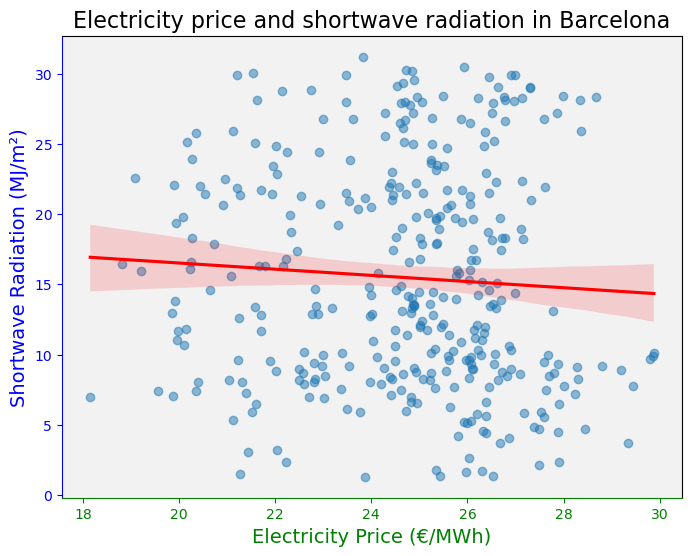

In [106]:
# Calcular el coeficiente de correlación
correlation = Radiacion_join[['avg total price (euro/MWh)', 'VALOR']].corr()

# Mostrar la tabla de correlaciones
print(correlation)

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x='avg total price (euro/MWh)', y='VALOR', data=Radiacion_join, alpha=0.5)

# Agregar línea de tendencia
sns.regplot(x='avg total price (euro/MWh)', y='VALOR', data=Radiacion_join, ax=ax, scatter=False, color='red')

# Configurar el fondo degradado
ax.set_facecolor('#f2f2f2')

# Configurar los colores de los ejes y de las etiquetas
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='blue')
ax.spines['bottom'].set_color('green')
ax.spines['left'].set_color('blue')
ax.set_xlabel('Electricity Price (€/MWh)', color='green', fontsize=14)
ax.set_ylabel('Shortwave Radiation (MJ/m²)', color='blue', fontsize=14)

# Agregar un título y leyenda
plt.title('Electricity price and shortwave radiation in Barcelona', fontsize=16)

# Mostrar la gráfica
plt.show()

                            avg total price (euro/MWh)     VALOR
avg total price (euro/MWh)                    1.000000 -0.032997
VALOR                                        -0.032997  1.000000


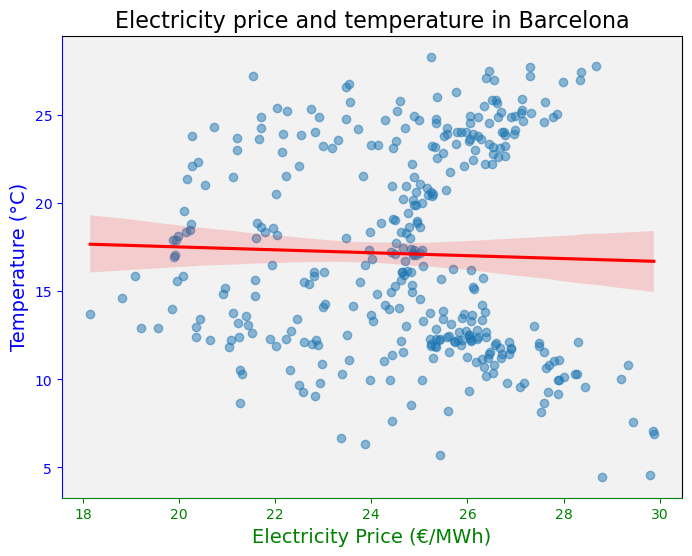

In [104]:
# Calcular el coeficiente de correlación
correlation = Temperatura_join[['avg total price (euro/MWh)', 'VALOR']].corr()

# Mostrar la tabla de correlaciones
print(correlation)

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x='avg total price (euro/MWh)', y='VALOR', data=Temperatura_join, alpha=0.5)

# Agregar línea de tendencia
sns.regplot(x='avg total price (euro/MWh)', y='VALOR', data=Temperatura_join, ax=ax, scatter=False, color='red')

# Configurar el fondo degradado
ax.set_facecolor('#f2f2f2')

# Configurar los colores de los ejes y de las etiquetas
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='blue')
ax.spines['bottom'].set_color('green')
ax.spines['left'].set_color('blue')
ax.set_xlabel('Electricity Price (€/MWh)', color='green', fontsize=14)
ax.set_ylabel('Temperature (°C)', color='blue', fontsize=14)

# Agregar un título y leyenda
plt.title('Electricity price and temperature in Barcelona', fontsize=16)

# Mostrar la gráfica
plt.show()

                            avg total price (euro/MWh)     VALOR
avg total price (euro/MWh)                    1.000000  0.108806
VALOR                                         0.108806  1.000000


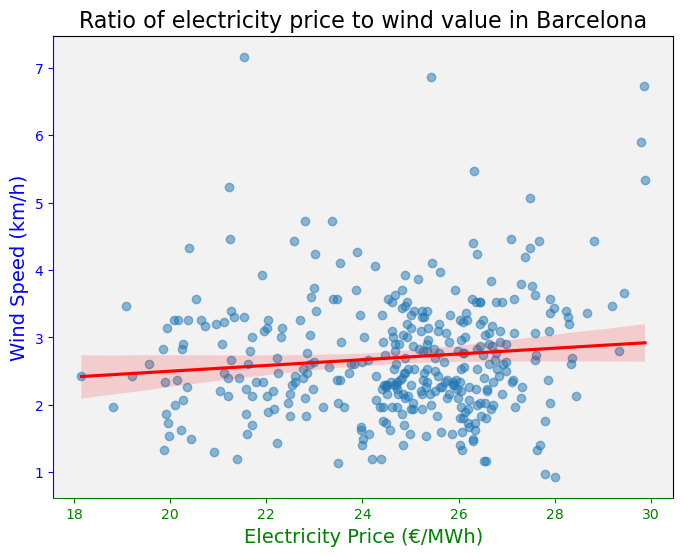

In [98]:
# Calcular el coeficiente de correlación
correlation = Viento_join[['avg total price (euro/MWh)', 'VALOR']].corr()

# Mostrar la tabla de correlaciones
print(correlation)

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x='avg total price (euro/MWh)', y='VALOR', data=Viento_join, alpha=0.5)

# Agregar línea de tendencia
sns.regplot(x='avg total price (euro/MWh)', y='VALOR', data=Viento_join, ax=ax, scatter=False, color='red')

# Configurar el fondo degradado
ax.set_facecolor('#f2f2f2')

# Configurar los colores de los ejes y de las etiquetas
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='blue')
ax.spines['bottom'].set_color('green')
ax.spines['left'].set_color('blue')
ax.set_xlabel('Electricity Price (€/MWh)', color='green', fontsize=14)
ax.set_ylabel('Wind Speed (km/h)', color='blue', fontsize=14)

# Agregar un título y leyenda
plt.title('Ratio of electricity price to wind value in Barcelona', fontsize=16)

# Mostrar la gráfica
plt.show()

                            avg total price (euro/MWh)  \
avg total price (euro/MWh)                    1.000000   
windspeed_10m_max (km/h)                     -0.043929   

                            windspeed_10m_max (km/h)  
avg total price (euro/MWh)                 -0.043929  
windspeed_10m_max (km/h)                    1.000000  


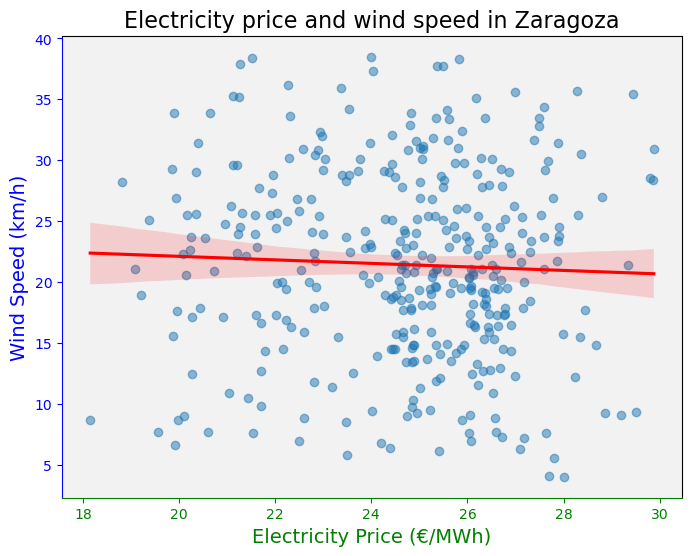

In [99]:
# Calcular el coeficiente de correlación
correlation = Zaragoza_join[['avg total price (euro/MWh)', 'windspeed_10m_max (km/h)']].corr()

# Mostrar la tabla de correlaciones
print(correlation)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))

# Crear el scatter plot
ax.scatter(x='avg total price (euro/MWh)', y='windspeed_10m_max (km/h)', data=Zaragoza_join, alpha=0.5)

# Agregar línea de tendencia
sns.regplot(x='avg total price (euro/MWh)', y='windspeed_10m_max (km/h)', data=Zaragoza_join, ax=ax, scatter=False, color='red')

# Configurar el fondo degradado
ax.set_facecolor('#f2f2f2')

# Configurar los colores de los ejes y de las etiquetas
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='blue')
ax.spines['bottom'].set_color('green')
ax.spines['left'].set_color('blue')
ax.set_xlabel('Electricity Price (€/MWh)', color='green', fontsize=14)
ax.set_ylabel('Wind Speed (km/h)', color='blue', fontsize=14)

# Agregar un título y leyenda
plt.title('Electricity price and wind speed in Zaragoza', fontsize=16)

# Mostrar la gráfica
plt.show()

                                 avg total price (euro/MWh)  \
avg total price (euro/MWh)                         1.000000   
shortwave_radiation_sum (MJ/m²)                   -0.033516   

                                 shortwave_radiation_sum (MJ/m²)  
avg total price (euro/MWh)                             -0.033516  
shortwave_radiation_sum (MJ/m²)                         1.000000  


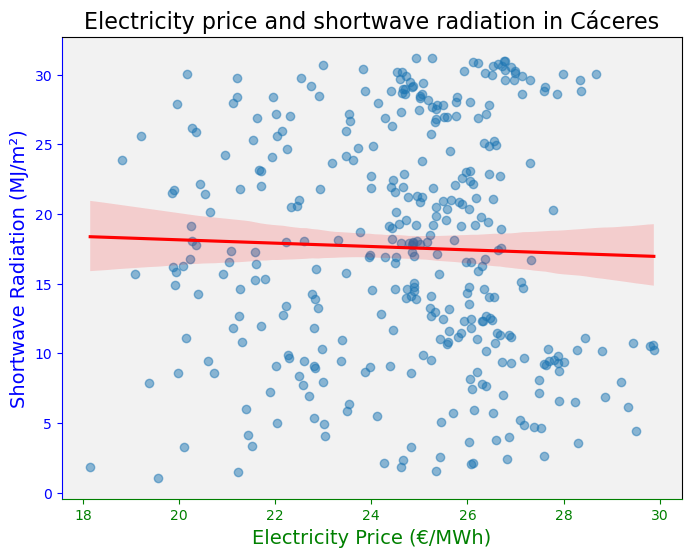

In [102]:
# Calcular el coeficiente de correlación
correlation = Radiation_join[['avg total price (euro/MWh)', 'shortwave_radiation_sum (MJ/m²)']].corr()

# Mostrar la tabla de correlaciones
print(correlation)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))

# Crear el scatter plot
ax.scatter(x='avg total price (euro/MWh)', y='shortwave_radiation_sum (MJ/m²)', data= Radiation_join, alpha=0.5)

# Agregar línea de tendencia
sns.regplot(x='avg total price (euro/MWh)', y='shortwave_radiation_sum (MJ/m²)', data= Radiation_join, ax=ax, scatter=False, color='red')

# Configurar el fondo degradado
ax.set_facecolor('#f2f2f2')

# Configurar los colores de los ejes y de las etiquetas
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='blue')
ax.spines['bottom'].set_color('green')
ax.spines['left'].set_color('blue')
ax.set_xlabel('Electricity Price (€/MWh)', color='green', fontsize=14)
ax.set_ylabel('Shortwave Radiation (MJ/m²)', color='blue', fontsize=14)

# Agregar un título y leyenda
plt.title('Electricity price and shortwave radiation in Cáceres', fontsize=16)

# Mostrar la gráfica
plt.show()